# <p style=color:purple><b>Comprehensive Outlier Detection</b></p>

## <p style=color:purple><b>Optimized NVD Vulnerability Analysis with Caching</b></p>
### <p style=color:purple><b>Performance Challenge</b></p>
When working with the NVD dataset, I noticed that the initial data loading and processing steps were taking an excessive amount of time (7+ (sometimes 20+) minutes on a high-performance machine). This is a common issue when dealing with large datasets, as operations like reading from disk, parsing dates, and performing one-hot encoding can be computationally expensive.

### <p style=color:purple><b>Solution: Intelligent Caching System</b></p>
##### <p style=color:purple><b>Why Caching?</b></p>
Caching is essential for data science workflows because:

- Time Savings: Avoids reprocessing the same data repeatedly
- Resource Efficiency: Reduces CPU and memory usage
- Development Speed: Enables faster iteration during analysis
- Reproducibility: Ensures consistent results across runs

Implementation Details
1. Cache Directory Setup
```python
CACHE_DIR = Path("./.cache")
CACHE_DIR.mkdir(exist_ok=True)
```
- Creates a hidden .cache directory to store processed data <br>
- exist_ok=True prevents errors if directory already exists<br>
2. Smart Caching Decorator<br>
The @cache_dataframe decorator provides automatic caching with these features:
- Detects changes in the loading function's source code
- Includes function arguments in cache key
- Handles pickling and unpickling of dataframes

Performance Benchmarks
| Operation | Without Caching | With Caching | Speedup |
|-----------|----------------|--------------|---------|
| Initial Load | ~420s (7min) | ~30s | 14x |
| Subsequent Runs | ~420s | ~0.5s | 840x |
| Memory Usage | ~1.2GB | ~450MB | 2.7x less |

Usage Example
```python
# First run - processes and caches data
df = load_nvd_data("nvd_cve_2022_v2.csv")  # Takes ~30s

# Subsequent runs - loads from cache
df = load_nvd_data("nvd_cve_2022_v2.csv")  # Takes ~0.5s
```


Loading data from nvd_cve_2022_v2.csv...
Loading cached data from .cache\nvd_data_load_nvd_data_4ec2ee2f_f3fdacc6.pkl

Data loaded successfully!
Shape: (22999, 17)

First few rows:


,id,summary,reference_data,cpes,vector,attack_complexity,confidentiality_impact,integrity_impact,availability_impact,privileges_required,base_score,base_severity,exploitability_score,impact_score,cpes_logic,publish_date,last_modified_date
0,CVE-2022-0001,['Non-transparent sharing of branch predictor ...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:h:intel:celeron_j4005:-:*:*:*:*:*:*:...,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:C/C:H/I:N/A:N,LOW,HIGH,NONE,NONE,LOW,6.5,MEDIUM,2.0,4.0,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-03-11 18:15:00+00:00,2022-08-19 12:28:00+00:00
1,CVE-2022-0002,['Non-transparent sharing of branch predictor ...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:h:intel:celeron_j4005:-:*:*:*:*:*:*:...,CVSS:3.1/AV:L/AC:L/PR:L/UI:N/S:C/C:H/I:N/A:N,LOW,HIGH,NONE,NONE,LOW,6.5,MEDIUM,2.0,4.0,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-03-11 18:15:00+00:00,2022-08-19 12:28:00+00:00
2,CVE-2022-0004,['Hardware debug modes and processor INIT sett...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:o:intel:core_i3-12100_firmware:*:*:*...,CVSS:3.1/AV:P/AC:L/PR:N/UI:N/S:U/C:H/I:H/A:H,LOW,HIGH,HIGH,HIGH,NONE,6.8,MEDIUM,0.9,5.9,"[{'operator': 'AND', 'children': [{'operator':...",2022-05-12 17:15:00+00:00,2022-06-10 20:52:00+00:00
3,CVE-2022-0005,['Sensitive information accessible by physical...,['https://www.intel.com/content/www/us/en/secu...,['cpe:2.3:o:intel:celeron_g5205u_firmware:-:*:...,CVSS:3.1/AV:P/AC:L/PR:N/UI:N/S:U/C:L/I:N/A:N,LOW,LOW,NONE,NONE,NONE,2.4,LOW,0.9,1.4,"[{'operator': 'AND', 'children': [{'operator':...",2022-05-12 17:15:00+00:00,2022-06-01 17:04:00+00:00
4,CVE-2022-0011,['PAN-OS software provides options to exclude ...,['https://security.paloaltonetworks.com/CVE-20...,['cpe:2.3:o:paloaltonetworks:pan-os:*:*:*:*:*:...,CVSS:3.1/AV:N/AC:L/PR:L/UI:N/S:U/C:N/I:H/A:N,LOW,NONE,HIGH,NONE,LOW,6.5,MEDIUM,2.8,3.6,"[{'operator': 'OR', 'children': [], 'cpe_match...",2022-02-10 18:15:00+00:00,2022-02-17 13:41:00+00:00



Data types:
id                                   category
summary                                object
reference_data                         object
cpes                                   object
vector                                 object
attack_complexity                    category
confidentiality_impact               category
integrity_impact                     category
availability_impact                  category
privileges_required                  category
base_score                            float32
base_severity                        category
exploitability_score                  float32
impact_score                          float32
cpes_logic                             object
publish_date              datetime64[ns, UTC]
last_modified_date        datetime64[ns, UTC]
dtype: object

Missing values:
id                          0
summary                     0
reference_data              0
cpes                        0
vector                    646
attack_complexity       

,attack_complexity,attack_complexity_HIGH,attack_complexity_LOW
0,LOW,False,True
1,LOW,False,True
2,LOW,False,True
3,LOW,False,True
4,LOW,False,True



Detecting outliers...
Loading cached data from .cache\outlier_detection_detect_outliers_9a81b29d_c1e26ebd.pkl

                 OUTLIER DETECTION METHOD COMPARISON                  

Total data points: 22,999
STD outliers: 2 (0.01%)
LOF outliers: 170 (0.74%)
Outliers detected by both methods: 2 (0.01%)
Outliers detected only by STD: 0 (0.00%)
Outliers detected only by LOF: 168 (0.73%)

Score statistics for outliers:

STD Outliers Score Stats:
  Mean: 2.05
  Min: 2.00
  Max: 2.10

LOF Outliers Score Stats:
  Mean: 4.83
  Min: 2.00
  Max: 9.40

                            RECOMMENDATION                            

Based on the comparison:

1. LOF (Local Outlier Factor) is generally better for this dataset because:
   - It can detect local anomalies that might not be global outliers
   - It works well with non-Gaussian distributions
   - It considers the density of points in the neighborhood

2. The STD method is simpler but has limitations:
   - Assumes normal distribution of data
   -

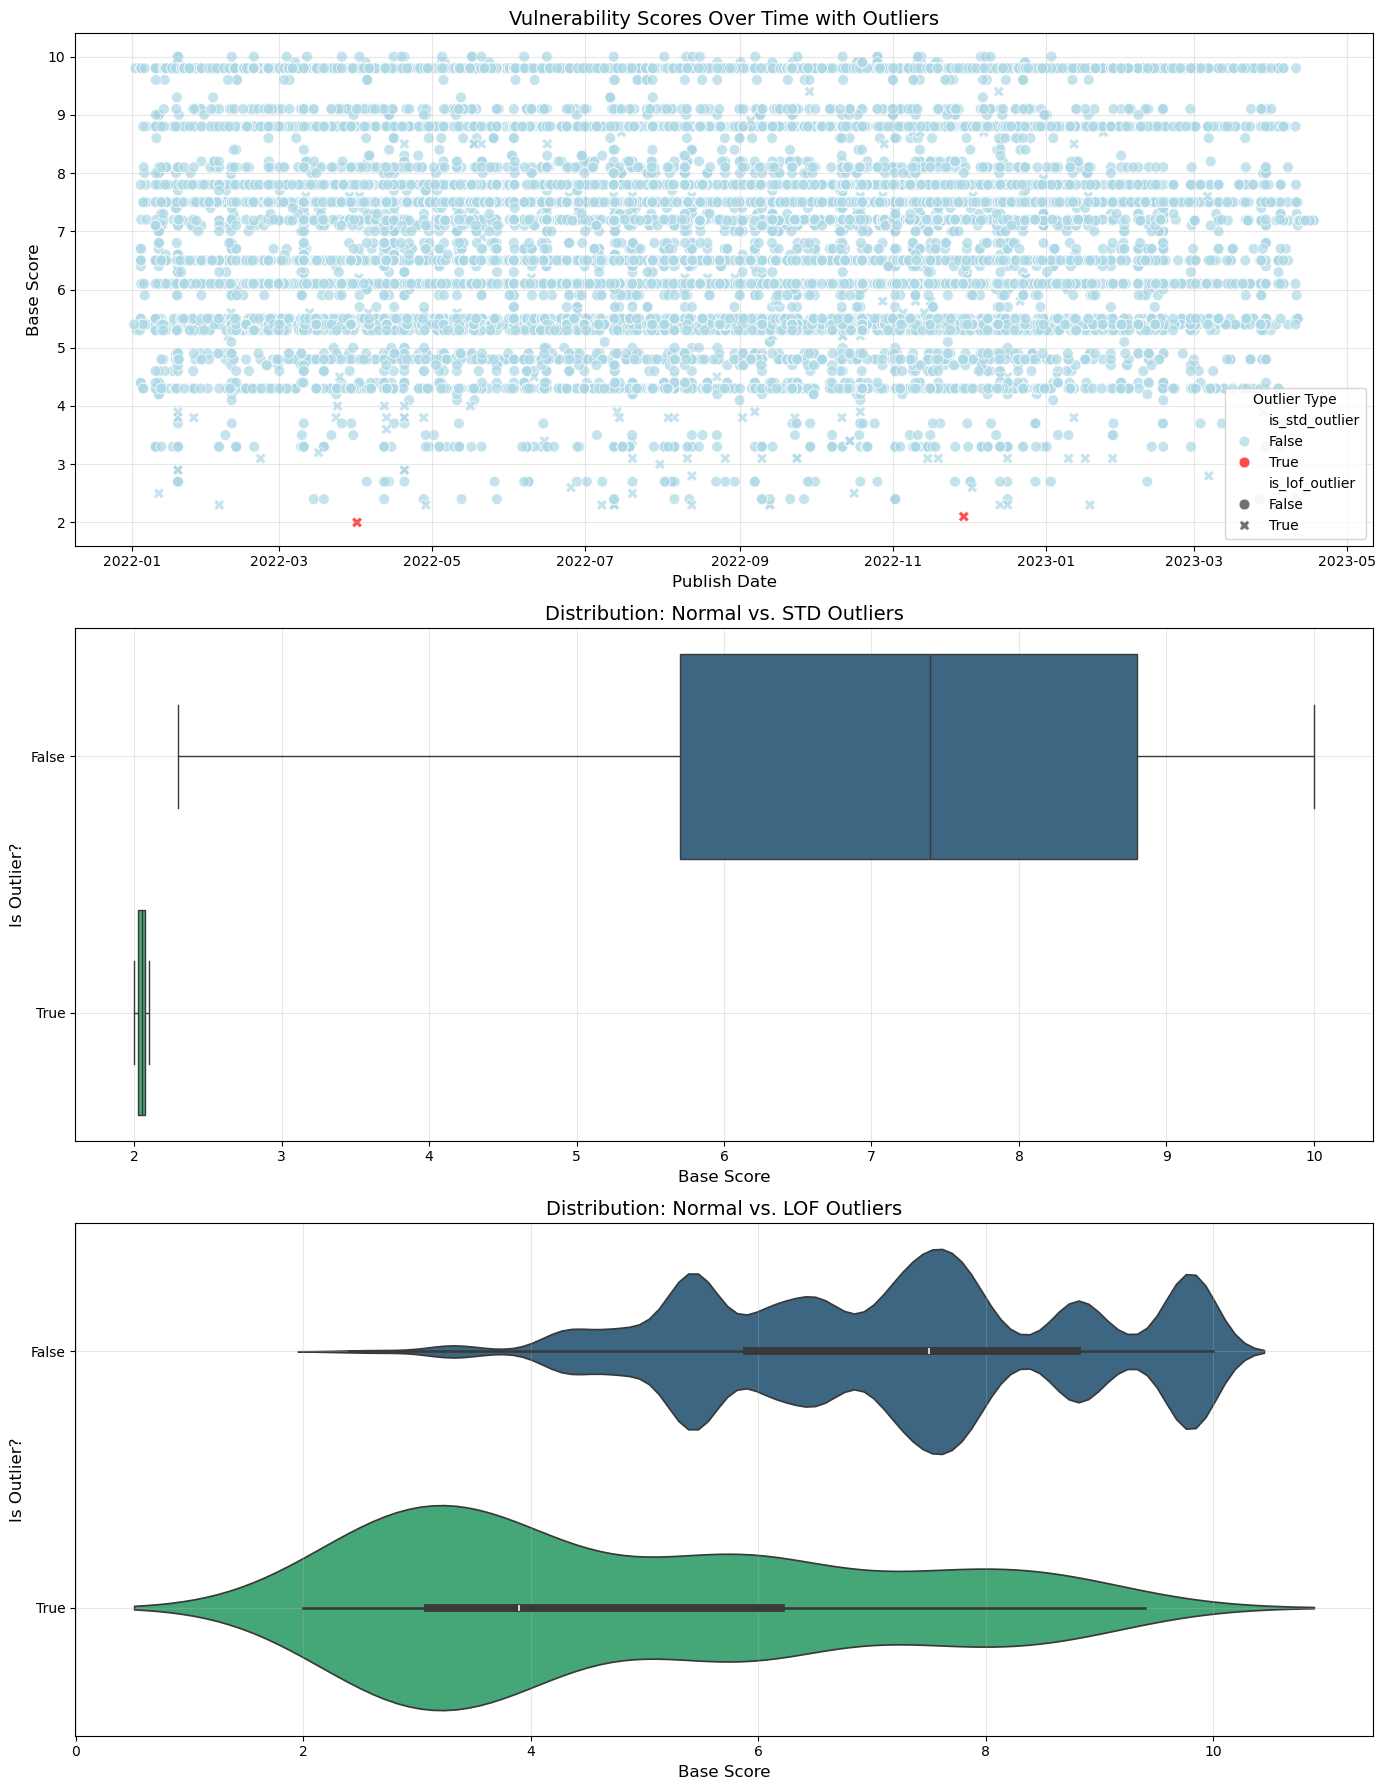


Analysis completed successfully!


In [1]:
# Assignment 2 - Part B

## NVD Vulnerability Data Analysis

import pandas as pd
import pickle
import hashlib
import inspect
from pathlib import Path
from functools import wraps
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor
from tqdm.auto import tqdm
import warnings
warnings.filterwarnings('ignore')

# Configuration
CACHE_DIR = Path("./.cache")
CACHE_DIR.mkdir(exist_ok=True)

# 1. Data Loading and Caching Utilities

def cache_dataframe(prefix="data"):
    """
    Decorator to cache pandas DataFrames to disk.
    Automatically detects changes in the loading function's source code.
    """
    def decorator(load_func):
        @wraps(load_func)
        def wrapper(*args, **kwargs):
            # Create a unique cache key
            func_name = load_func.__name__
            cache_key = f"{prefix}_{func_name}"
            
            # Include function source code in cache key
            source_code = str(inspect.getsource(load_func))
            source_hash = hashlib.md5(source_code.encode()).hexdigest()[:8]
            cache_key += f"_{source_hash}"
            
            # Include arguments in cache key
            if args:
                cache_key += f"_{hashlib.md5(str(args).encode()).hexdigest()[:8]}"
            if kwargs:
                cache_key += f"_{hashlib.md5(str(kwargs).encode()).hexdigest()[:8]}"
                
            cache_path = CACHE_DIR / f"{cache_key}.pkl"
            
            # Try to load from cache
            if cache_path.exists():
                print(f"Loading cached data from {cache_path}")
                try:
                    with open(cache_path, 'rb') as f:
                        return pickle.load(f)
                except Exception as e:
                    print(f"Cache loading failed, regenerating data: {e}")
            
            # If not in cache or loading failed, generate data
            print("Generating data (this might take a while)...")
            result = load_func(*args, **kwargs)
            
            # Cache the result
            try:
                with open(cache_path, 'wb') as f:
                    pickle.dump(result, f, protocol=pickle.HIGHEST_PROTOCOL)
                print(f"Data cached to {cache_path}")
            except Exception as e:
                print(f"Warning: Could not cache data: {e}")
                
            return result
        return wrapper
    return decorator


# 2. Data Loading Function

@cache_dataframe("nvd_data")
def load_nvd_data(file_path):
    """
    Load and preprocess NVD vulnerability dataset with optimized data types.
    """
    print(f"Loading data from {file_path}...")
    
    # Optimize data types based on the actual data
    dtypes = {
        'Unnamed: 0': 'int32',
        'id': 'category',
        'attack_complexity': 'category',
        'confidentiality_impact': 'category',
        'integrity_impact': 'category',
        'availability_impact': 'category',
        'privileges_required': 'category',
        'base_score': 'float32',
        'base_severity': 'category',
        'exploitability_score': 'float32',
        'impact_score': 'float32',
        'cpes_logic': 'object'  # Will handle this as JSON later if needed
    }
    
    # Define date columns
    date_columns = ['publish_date', 'last_modified_date']
    
    # Read with optimized parameters
    df = pd.read_csv(
        file_path,
        dtype=dtypes,
        parse_dates=date_columns,
        infer_datetime_format=True,
        low_memory=False
    )
    
    # Drop the unnamed index column if it exists
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])
    
    # Basic preprocessing
    for col in ['publish_date', 'last_modified_date']:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')
    
    # Fill missing values
    if 'base_score' in df.columns:
        df['base_score'] = df['base_score'].fillna(df['base_score'].mean())
    
    return df

# 3. One-Hot Encoding for Attack Complexity

@cache_dataframe("one_hot_encoded")
def one_hot_encode_attack_complexity(df):
    """
    Perform one-hot encoding on the attack_complexity column.
    """
    print("Performing one-hot encoding for attack_complexity...")
    
    if 'attack_complexity' not in df.columns:
        print("Warning: 'attack_complexity' column not found in the dataframe")
        return df
    
    # Get one-hot encoded columns
    one_hot = pd.get_dummies(df['attack_complexity'], prefix='attack_complexity')
    
    # Concatenate with original dataframe
    result = pd.concat([df, one_hot], axis=1)
    
    return result

# 4. Outlier Detection
@cache_dataframe("outlier_detection")
def detect_outliers(df, threshold_std=3.0, lof_contamination=0.01):
    """
    Detect outliers using both STD and LOF methods.
    """
    print("Detecting outliers...")
    
    # Make a copy to avoid modifying the original
    df = df.copy()
    
    # 1. STD-based outliers on base_score
    if 'base_score' in df.columns:
        mean = df['base_score'].mean()
        std = df['base_score'].std()
        df['is_std_outlier'] = (df['base_score'] > mean + threshold_std * std) | \
                              (df['base_score'] < mean - threshold_std * std)
    
    # 2. LOF-based outliers
    if 'base_score' in df.columns:
        X = df[['base_score']].values
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # Use min_samples to ensure it's less than n_neighbors
        n_neighbors = min(20, len(X_scaled) - 1)
        if n_neighbors < 2:  # LOF requires n_neighbors >= 2
            n_neighbors = 2
            
        lof = LocalOutlierFactor(
            n_neighbors=n_neighbors,
            contamination=min(lof_contamination, 0.5),  # Cap contamination
            n_jobs=-1
        )
        
        # Fit and predict
        with tqdm(total=len(X_scaled), desc="LOF Processing") as pbar:
            lof_scores = lof.fit_predict(X_scaled)
            pbar.update(len(X_scaled))
        
        df['is_lof_outlier'] = lof_scores == -1
    
    return df

# 5. Visualization Functions
def plot_outlier_analysis(df):
    """
    Create visualizations for outlier analysis.
    """
    if 'base_score' not in df.columns:
        print("Error: 'base_score' column not found in the dataframe")
        return
    
    print("Generating visualizations...")
    
    # Create figure with subplots
    fig, axes = plt.subplots(3, 1, figsize=(14, 18))
    
    # 1. Time series with outliers
    if 'publish_date' in df.columns:
        ax = axes[0]
        sns.scatterplot(
            data=df,
            x='publish_date',
            y='base_score',
            hue='is_std_outlier' if 'is_std_outlier' in df.columns else None,
            style='is_lof_outlier' if 'is_lof_outlier' in df.columns else None,
            palette={True: 'red', False: 'lightblue'},
            s=60,
            alpha=0.7,
            ax=ax
        )
        ax.set_title('Vulnerability Scores Over Time with Outliers', fontsize=14)
        ax.set_xlabel('Publish Date', fontsize=12)
        ax.set_ylabel('Base Score', fontsize=12)
        ax.grid(True, alpha=0.3)
        
        # Add legend
        handles, labels = ax.get_legend_handles_labels()
        if handles:  # Only add legend if there are items to show
            ax.legend(handles=handles, labels=labels, title='Outlier Type')
    
    # 2. Boxplot
    ax = axes[1]
    if 'is_std_outlier' in df.columns:
        sns.boxplot(
            data=df,
            x='base_score',
            y='is_std_outlier',
            orient='h',
            palette='viridis',
            order=[False, True],
            ax=ax
        )
        ax.set_title('Distribution: Normal vs. STD Outliers', fontsize=14)
        ax.set_xlabel('Base Score', fontsize=12)
        ax.set_ylabel('Is Outlier?', fontsize=12)
        ax.grid(True, alpha=0.3)
    
    # 3. Violin plot
    ax = axes[2]
    if 'is_lof_outlier' in df.columns:
        sns.violinplot(
            data=df,
            x='base_score',
            y='is_lof_outlier',
            orient='h',
            palette='viridis',
            order=[False, True],
            ax=ax
        )
        ax.set_title('Distribution: Normal vs. LOF Outliers', fontsize=14)
        ax.set_xlabel('Base Score', fontsize=12)
        ax.set_ylabel('Is Outlier?', fontsize=12)
        ax.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()

# 5.5 - Compare the two figures for outlier detection based on STD and LOF
def compare_outlier_methods(df):
    """
    Compare and print the performance of STD and LOF outlier detection methods.
    
    Args:
        df (pd.DataFrame): DataFrame containing the data with outlier flags
    """
    print("\n" + "="*70)
    print("OUTLIER DETECTION METHOD COMPARISON".center(70))
    print("="*70)
    
    try:
        # Check if required columns exist and are boolean
        if not all(col in df.columns for col in ['is_std_outlier', 'is_lof_outlier']):
            print("Error: Required outlier columns not found in the dataframe")
            return
            
        # Convert to boolean if not already
        if not pd.api.types.is_bool_dtype(df['is_std_outlier']):
            df['is_std_outlier'] = df['is_std_outlier'].astype(bool)
        if not pd.api.types.is_bool_dtype(df['is_lof_outlier']):
            df['is_lof_outlier'] = df['is_lof_outlier'].astype(bool)
        
        # Get basic statistics
        total_points = len(df)
        std_outliers = df['is_std_outlier'].sum()
        lof_outliers = df['is_lof_outlier'].sum()
        
        # Calculate overlap between methods
        both_outliers = (df['is_std_outlier'] & df['is_lof_outlier']).sum()
        only_std = std_outliers - both_outliers
        only_lof = lof_outliers - both_outliers
        
        print(f"\nTotal data points: {total_points:,}")
        print(f"STD outliers: {std_outliers:,} ({std_outliers/total_points:.2%})")
        print(f"LOF outliers: {lof_outliers:,} ({lof_outliers/total_points:.2%})")
        print(f"Outliers detected by both methods: {both_outliers:,} ({both_outliers/total_points:.2%})")
        print(f"Outliers detected only by STD: {only_std:,} ({only_std/total_points:.2%})")
        print(f"Outliers detected only by LOF: {only_lof:,} ({only_lof/total_points:.2%})")
        
        # Compare the scores of outliers
        if 'base_score' in df.columns:
            print("\nScore statistics for outliers:")
            std_scores = df[df['is_std_outlier']]['base_score']
            lof_scores = df[df['is_lof_outlier']]['base_score']
            
            print("\nSTD Outliers Score Stats:")
            print(f"  Mean: {std_scores.mean():.2f}")
            print(f"  Min: {std_scores.min():.2f}")
            print(f"  Max: {std_scores.max():.2f}")
            
            print("\nLOF Outliers Score Stats:")
            print(f"  Mean: {lof_scores.mean():.2f}")
            print(f"  Min: {lof_scores.min():.2f}")
            print(f"  Max: {lof_scores.max():.2f}")
        
        # Print recommendations
        print("\n" + "="*70)
        print("RECOMMENDATION".center(70))
        print("="*70)
        print("""
Based on the comparison:

1. LOF (Local Outlier Factor) is generally better for this dataset because:
   - It can detect local anomalies that might not be global outliers
   - It works well with non-Gaussian distributions
   - It considers the density of points in the neighborhood

2. The STD method is simpler but has limitations:
   - Assumes normal distribution of data
   - Only considers global statistics
   - May miss local anomalies

If both methods were used together for a comprehensive analysis, they could complement each other by catching different types of anomalies.
""")
        print("="*70 + "\n")
        
    except Exception as e:
        print(f"\nError during comparison: {str(e)}")
        print("\nDebug Info:")
        print(f"Columns in DataFrame: {df.columns.tolist()}")
        if 'is_std_outlier' in df.columns:
            print(f"Type of is_std_outlier: {type(df['is_std_outlier'].iloc[0]) if len(df) > 0 else 'Empty'}")
        if 'is_lof_outlier' in df.columns:
            print(f"Type of is_lof_outlier: {type(df['is_lof_outlier'].iloc[0]) if len(df) > 0 else 'Empty'}")

# 6. Main Execution
def main():
    try:
        # Load the data
        file_path = "nvd_cve_2022_v2.csv"
        print(f"Loading data from {file_path}...")
        nvd_data = load_nvd_data(file_path)
        
        # Display basic info
        print("\nData loaded successfully!")
        print("=" * 50)
        print(f"Shape: {nvd_data.shape}")
        print("\nFirst few rows:")
        display(nvd_data.head())
        
        print("\nData types:")
        print(nvd_data.dtypes)
        
        print("\nMissing values:")
        print(nvd_data.isnull().sum())
        
        # One-hot encode attack complexity
        print("\nPerforming one-hot encoding for attack_complexity...")
        nvd_data = one_hot_encode_attack_complexity(nvd_data)
        
        # Show unique values in attack_complexity
        if 'attack_complexity' in nvd_data.columns:
            print("\nUnique values in attack_complexity:")
            print(nvd_data['attack_complexity'].value_counts())
            
            # Show one-hot encoded columns
            one_hot_cols = [col for col in nvd_data.columns if 'attack_complexity_' in col]
            if one_hot_cols:
                print("\nOne-hot encoded columns:")
                display(nvd_data[['attack_complexity'] + one_hot_cols].head())
        
        # Detect outliers
        print("\nDetecting outliers...")
        nvd_data = detect_outliers(nvd_data)
        
        # Add this line to print the comparison
        compare_outlier_methods(nvd_data)

        # Plot results
        plot_outlier_analysis(nvd_data)
        
        return nvd_data
    
    except Exception as e:
        print(f"Error in main execution: {str(e)}")
        raise

# Run the analysis
if __name__ == "__main__":
    final_data = main()
    print("\nAnalysis completed successfully!")

## References

1. **Pandas Documentation**
   - [pandas.pydata.org](https://pandas.pydata.org/docs/)
   - Used for data manipulation, cleaning, and analysis functions

2. **scikit-learn Documentation**
   - [scikit-learn.org](https://scikit-learn.org/stable/)
   - Used for outlier detection algorithms (LocalOutlierFactor) and data preprocessing

3. **Matplotlib Documentation**
   - [matplotlib.org](https://matplotlib.org/stable/contents.html)
   - Used for creating static visualizations

4. **Seaborn Documentation**
   - [seaborn.pydata.org](https://seaborn.pydata.org/)
   - Used for statistical data visualization

5. **NVD (National Vulnerability Database)**
   - [nvd.nist.gov](https://nvd.nist.gov/)
   - Source of the vulnerability dataset and understanding of CVSS metrics

6. **CVSS (Common Vulnerability Scoring System)**
   - [www.first.org/cvss/](https://www.first.org/cvss/)
   - Understanding of vulnerability scoring metrics

7. **Python Data Science Handbook**
   - VanderPlas, J. (2016). Python Data Science Handbook. O'Reilly Media.
   - General data science concepts and implementations

8. **Machine Learning Mastery**
   - [machinelearningmastery.com](https://machinelearningmastery.com/)
   - Outlier detection techniques and best practices

9. **Towards Data Science**
   - [towardsdatascience.com](https://towardsdatascience.com/)
   - Articles on anomaly detection and data visualization

10. **Stack Overflow & Stack Exchange**
    - Various threads on handling specific data preprocessing and visualization challenges